## Interactive visualizations

In [1]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

In [2]:
import mpld3
from mpld3 import plugins

In [3]:
import pickle
data = pickle.load(open('../data/correlation_map.pkl', 'rb'))
correlation = data['correlation']
excitation = data['excitation energy']
emission = data['emission energy']

In [4]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))

map0 = ax.imshow(correlation,
          origin='lower',
          extent=[excitation.min(), excitation.max(), emission.min(), emission.max()],
          cmap=matplotlib.cm.magma)

ax.plot(excitation, excitation)

ax.set_xlabel('Excitation Energy (eV)')

f.colorbar(map0, ax=ax)

plugins.connect(f, plugins.MousePosition(fontsize=14))

mpld3.display()

More interactivity + dimensionality can be achieved with a tooltip plugin: 
https://mpld3.github.io/examples/html_tooltips.html

## Maps

Reference: http://oceanpython.org/2012/11/29/global-rtofs-real-time-ocean-forecast-system/

In [5]:
from mpl_toolkits.basemap import Basemap
import netCDF4
import numpy as np

In [6]:
nc = '/home/marianne/Downloads/rtofs_glo_3dz_f048_daily_3ztio.nc'

In [7]:
file = netCDF4.Dataset(nc)

In [8]:
lat  = file.variables['Latitude'][:]

In [9]:
lon  = file.variables['Longitude'][:]

In [10]:
lat.shape

(3298, 4500)

In [11]:
file.variables['temperature'].shape

(1, 33, 3298, 4500)

In [12]:
# Extract the sea surface temperature (SST) field
sst = file.variables['temperature'][0, 0, :, :]

In [13]:
# Clean-up / workaround
lon = np.where(np.greater_equal(lon, 500), np.nan, lon)

In [14]:
file.close()

[]

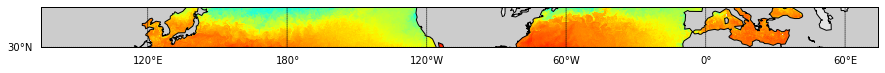

In [15]:
plt.figure(figsize=(15, 5))

m = Basemap(projection='mill',
            lat_ts=10,
            llcrnrlon=np.nanmin(lon),
            urcrnrlon=np.nanmax(lon),
            llcrnrlat=30,
            urcrnrlat=45,
            resolution='c')
 
x, y = m(lon, lat)  # convert the lon/lat values to x/y projections
cs = m.pcolormesh(x, y, sst, cmap=matplotlib.cm.jet)
 
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90, 120, 30), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180, 60), labels=[0, 0, 0, 1])

plt.plot()

[]

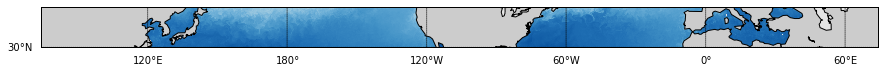

In [16]:
plt.figure(figsize=(15, 5))

m = Basemap(projection='mill',
            lat_ts=10,
            llcrnrlon=np.nanmin(lon),
            urcrnrlon=np.nanmax(lon),
            llcrnrlat=30,
            urcrnrlat=45,
            resolution='c')
 
x, y = m(lon, lat)
cs = m.pcolormesh(x, y, sst, cmap=matplotlib.cm.Blues)

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90, 120, 30), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180, 60), labels=[0, 0, 0, 1])

plt.plot()